# Macaque CT-model's Experiment

In [10]:
import os
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
os.chdir('../')
from src.data_loading import LoadCSVandVIDEO
from src.data_preprocessing.video import rotate_video, crop_video_depend_scanposition, downsample_video
from src.intrinsic_dimension_estimation import Maximum_Likelihood_Estimation_of_ID as MLE_ID

In [2]:
rcParams_dict = {
    'font.family':'Times New Roman',
    'mathtext.fontset':'stix',
    'font.size':15,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'axes.linewidth':1.5,
    'xtick.major.size':8,
    'ytick.major.size':8,}
for key in rcParams_dict.keys():plt.rcParams[str(key)] = rcParams_dict[str(key)]

In [3]:
### DEFINE
N_TRAIN = 4000
K_LIST = np.arange(50, 2001, 50)
intrinsic_dim_list = []

In [4]:
### DEFINE
CSV_DIR = './data/macaque_exvivo/CSV/'
AVI_DIR = './data/macaque_exvivo/AVI/'
DATA_NAME = '952'
SAMPLE_SPAN = [70000, 80010]
LINESCAN_PARAM = {'position':[190, 180], 'width':200}
ROTATE_ANGLE = -40
DOWNSAMPLE_FACTOR = 4
OUTLIER_CORRECTION = 1e-10

In [5]:
### Load data
[], video, video_t = LoadCSVandVIDEO(CSV_DIR+DATA_NAME+".csv", [], SAMPLE_SPAN, AVI_DIR+DATA_NAME+".avi")
### Preprocess
video = rotate_video(video, ROTATE_ANGLE)
video = crop_video_depend_scanposition(video, LINESCAN_PARAM)
video = downsample_video(video, DOWNSAMPLE_FACTOR)
video_shape = video.shape
X, T = (video.reshape(-1, video_shape[1]*video_shape[2])+OUTLIER_CORRECTION)/255., video_t
T -= T[0]
del video, video_t
### Split X into train & test sets
X_train = X[:N_TRAIN]
T_train = T[:N_TRAIN]
del X, T
### Estimate intrinsic-dimension
estimator = MLE_ID()
intrinsic_dim = estimator.fit(X_train.reshape(-1, video_shape[1]*video_shape[2])+1e-100, K_LIST)
intrinsic_dim_list.append(intrinsic_dim)
del X_train, T_train, estimator

Loading csv data
file path | ./data/macaque_exvivo/CSV/952.csv
data list | 
Loading video data
file path | ./data/macaque_exvivo/AVI/952.avi


In [6]:
### DEFINE
CSV_DIR = './data/macaque_exvivo/CSV/'
AVI_DIR = './data/macaque_exvivo/AVI/'
DATA_NAME = '912'
SAMPLE_SPAN = [65000, 75010]
LINESCAN_PARAM = {'position':[155, 160], 'width':100}
ROTATE_ANGLE = 10
DOWNSAMPLE_FACTOR = 2

In [7]:
### Load data
[], video, video_t = LoadCSVandVIDEO(CSV_DIR+DATA_NAME+".csv", [], SAMPLE_SPAN, AVI_DIR+DATA_NAME+".avi")
### Preprocess
video = rotate_video(video, ROTATE_ANGLE)
video = crop_video_depend_scanposition(video, LINESCAN_PARAM)
video = downsample_video(video, DOWNSAMPLE_FACTOR)
video_shape = video.shape
X, T = (video.reshape(-1, video_shape[1]*video_shape[2]))/255., video_t
T -= T[0]
del video, video_t
### Split X into train & test sets
X_train = X[:N_TRAIN]
T_train = T[:N_TRAIN]
del X, T
### Estimate intrinsic-dimension
estimator = MLE_ID()
intrinsic_dim = estimator.fit(X_train.reshape(-1, video_shape[1]*video_shape[2]), K_LIST)
intrinsic_dim_list.append(intrinsic_dim)
del X_train, T_train, estimator

Loading csv data
file path | ./data/macaque_exvivo/CSV/912.csv
data list | 
Loading video data
file path | ./data/macaque_exvivo/AVI/912.avi


In [8]:
def estimated_dimension_list(dim_list, intrinsic_dim_list, k_list, label_list, start=0, y_lim=[0, None],
                             c=('b', 'r', 'g', 'm'), m=('o', 's', '^', 'v')):
    spec = gridspec.GridSpec(ncols=1, nrows=1)
    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_subplot(spec[0])
    for i in range(len(dim_list)): ax.axhline(y=dim_list[i], linestyle='--', c='k')
    for i in range(len(dim_list)): ax.plot(k_list[start:], intrinsic_dim_list[i][start:], marker=m[i], c=c[i], ms=5, label=label_list[i])
    ax.set_xlabel(r'Number of Nearest Neighbor $k$')
    ax.set_ylabel(r'Estimated dimension $\hat{D}$')
    ax.set_ylim(y_lim[0], y_lim[-1])
    fig.legend(loc="upper center", facecolor="white", edgecolor="white", bbox_to_anchor=(0.5, 1.06), ncol=len(dim_list))
    plt.show()

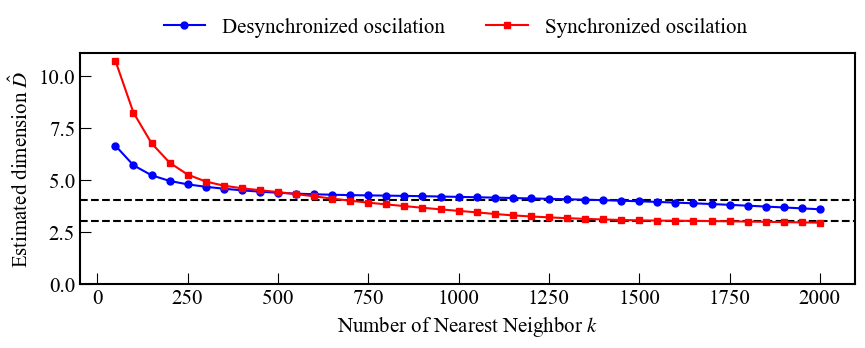

In [9]:
estimated_dimension_list([4, 3], intrinsic_dim_list, K_LIST, 
                         [r'Desynchronized oscilation',r'Synchronized oscilation', ], 0, [0, None])